In [1]:
import pandas as pd
import numpy as np

Limpieza csv coste de vida:

In [2]:
def costsCleaning():
    df = pd.read_csv('../INPUT/cost_of_life_by_country.csv')
    # Renaming columns of use:
    df.rename(columns={'Meal, Inexpensive Restaurant':'restaurant',
                      'Meal for 2 People, Mid-range Restaurant, Three-course':'mid-range restaurant',
                      'McMeal at McDonalds (or Equivalent Combo Meal)':'mcdonalds',
                      'Bottle of Wine (Mid-Range)':'wine',
                      'Cigarettes 20 Pack (Marlboro)':'cigarettes',
                      'Monthly Pass (Regular Price)':'public transport',
                      'Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)':'car',
                      'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)':'internet',
                      'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment':'utilities',
                      'Fitness Club, Monthly Fee for 1 Adult':'fitness',
                      'Cinema, International Release, 1 Seat':'cinema',
                      'Apartment (1 bedroom) in City Centre':'rent',
                      'Average Monthly Net Salary (After Tax)':'salary',
                      'Country':'country'
                     }, inplace=True)
    # Creating new column that groups all supermarket products simulating a shopping basket:
    df['supermarket'] = df['Milk (regular), (1 liter)'] + df['Loaf of Fresh White Bread (500g)'] + df['Rice (white), (1kg)'] + df['Eggs (regular) (12)'] + df['Local Cheese (1kg)'] + df['Chicken Breasts (Boneless, Skinless), (1kg)'] + df['Beef Round (1kg) (or Equivalent Back Leg Red Meat)'] + df['Apples (1kg)'] + df['Banana (1kg)'] + df['Oranges (1kg)'] + df['Tomato (1kg)'] + df['Potato (1kg)'] + df['Onion (1kg)'] + df['Lettuce (1 head)']
    # Creating final dataset:
    costs = df[['country', 'supermarket', 'restaurant', 'mid-range restaurant', 'mcdonalds', 'wine', 'cigarettes', 'rent', 'utilities', 'internet', 'fitness', 'cinema', 'public transport', 'car', 'salary']]
    # Removing Venezuela from the analysis as it is an outlier:
    costs = costs[costs.country != 'Venezuela']
    return costs

In [14]:
costs = costsCleaning()
costs

,country,supermarket,restaurant,mid-range restaurant,mcdonalds,wine,cigarettes,rent,utilities,internet,fitness,cinema,public transport,car,salary
0,Kazakhstan,22.51,4.75,23.75,4.28,4.75,0.95,266.08,49.38,10.40,37.80,3.56,16.63,15439.64,376.99
1,Paraguay,21.52,3.45,20.72,3.52,5.53,1.38,220.26,44.63,25.79,22.27,4.83,21.02,11050.72,316.20
2,Portugal,33.51,7.50,30.00,6.00,4.00,5.00,619.65,96.61,31.86,32.75,7.00,35.00,25000.00,830.15
3,Syria,20.82,3.61,14.00,3.61,2.94,2.34,176.54,17.15,30.94,13.07,4.38,9.68,18027.28,83.89
4,Greece,37.29,10.00,31.00,6.00,6.25,4.50,323.04,145.67,30.81,32.34,8.00,30.00,18000.00,708.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Denmark,53.71,16.06,80.30,10.04,8.03,6.02,859.02,170.31,32.20,32.66,14.05,53.53,33458.95,2773.91
97,Dominican Republic,29.85,5.06,33.72,5.90,7.59,3.37,332.15,53.69,47.49,24.48,4.85,30.35,20232.64,319.37
98,Mexico,27.46,4.78,23.92,4.37,7.18,2.49,305.22,32.85,24.51,28.18,3.35,16.74,15928.71,472.91
99,Montenegro,25.40,6.00,25.00,3.00,3.75,3.10,290.56,97.51,23.51,28.37,5.00,27.00,16000.00,464.10


Limpieza csv indice felicidad:

In [17]:
def happinessCleaning():
    df = pd.read_csv('../INPUT/2019.csv')
    # Renaming columns of use:
    df.rename(columns={'Country or region':'country',
                       'Score':'happiness',
                     }, inplace=True)
    happiness = df[['country', 'happiness']]
    return happiness

In [18]:
happiness = happinessCleaning()
happiness.head()

,country,happiness
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


Fusión de los csv:

In [19]:
# meter en la función donde haga todo de una:

merged = pd.merge(costs, happiness, how='inner', on=['country'])

In [20]:
merged.head()

,country,supermarket,restaurant,mid-range restaurant,mcdonalds,wine,cigarettes,rent,utilities,internet,fitness,cinema,public transport,car,salary,happiness
0,Kazakhstan,22.51,4.75,23.75,4.28,4.75,0.95,266.08,49.38,10.40,37.80,3.56,16.63,15439.64,376.99,5.809
1,Paraguay,21.52,3.45,20.72,3.52,5.53,1.38,220.26,44.63,25.79,22.27,4.83,21.02,11050.72,316.20,5.743
2,Portugal,33.51,7.50,30.00,6.00,4.00,5.00,619.65,96.61,31.86,32.75,7.00,35.00,25000.00,830.15,5.693
3,Syria,20.82,3.61,14.00,3.61,2.94,2.34,176.54,17.15,30.94,13.07,4.38,9.68,18027.28,83.89,3.462
4,Greece,37.29,10.00,31.00,6.00,6.25,4.50,323.04,145.67,30.81,32.34,8.00,30.00,18000.00,708.74,5.287


In [31]:
var = merged['country']
var

0             Kazakhstan
1               Paraguay
2               Portugal
3                  Syria
4                 Greece
             ...        
91               Denmark
92    Dominican Republic
93                Mexico
94            Montenegro
95             Indonesia
Name: country, Length: 96, dtype: object

In [22]:
cols = ['supermarket', 'restaurant', 'mid-range restaurant', 'mcdonalds', 'wine', 'cigarettes', 'rent', 'utilities', 'internet', 'fitness', 'cinema', 'public transport', 'car']
mux = pd.MultiIndex.from_product([cols, ['salary', 'happiness']])
df1 = merged[cols].div(merged['salary'], axis=0).mul(100).reindex(mux, axis=1, level=0)
idx = pd.IndexSlice
df1.loc[:, idx[:, 'happiness']] = merged[['happiness']*len(cols)].to_numpy()
df1

supermarket           restaurant           mid-range restaurant            \
        salary happiness     salary happiness               salary happiness   
0     5.970981     5.809   1.259980     5.809             6.299902     5.809   
1     6.805819     5.743   1.091082     5.743             6.552815     5.743   
2     4.036620     5.693   0.903451     5.693             3.613805     5.693   
3    24.818214     3.462   4.303254     3.462            16.688521     3.462   
4     5.261450     5.287   1.410955     5.287             4.373959     5.287   
..         ...       ...        ...       ...                  ...       ...   
91    1.936256     7.600   0.578966     7.600             2.894831     7.600   
92    9.346526     5.425   1.584369     5.425            10.558287     5.425   
93    5.806602     6.595   1.010763     6.595             5.058045     6.595   
94    5.472958     5.523   1.292825     5.523             5.386770     5.523   
95   11.239640     5.192   0.590991     5.192             3.715315     5.192   

   mcdonalds                wine            ...   internet            \
      salary happiness    salary happiness  ...     salary happiness   
0   1.135309     5.809  1.259980     5.809  ...   2.758694     5.809   
1   1.113219     5.743  1.748893     5.743  ...   8.156230     5.743   
2   0.722761     5.693  0.481841     5.693  ...   3.837861     5.693   
3   4.303254     3.462  3.504589     3.462  ...  36.881631     3.462   
4   0.846573     5.287  0.881847     5.287  ...   4.347151     5.287   
..       ...       ...       ...       ...  ...        ...       ...   
91  0.361944     7.600  0.289483     7.600  ...   1.160816     7.600   
92  1.847387     5.425  2.376554     5.425  ...  14.869900     5.425   
93  0.924066     6.595  1.518259     6.595  ...   5.182804     6.595   
94  0.646412     5.523  0.808016     5.523  ...   5.065719     5.523   
95  1.077477     5.192  5.895495     5.192  ...  10.627027     5.192   

      fitness              cinema           public transport            \
       salary happiness    salary happiness           salary happiness   
0   10.026791     5.809  0.944322     5.809         4.411258     5.809   
1    7.043011     5.743  1.527514     5.743         6.647691     5.743   
2    3.945070     5.693  0.843221     5.693         4.216106     5.693   
3   15.579926     3.462  5.221123     3.462        11.538920     3.462   
4    4.563027     5.287  1.128764     5.287         4.232864     5.287   
..        ...       ...       ...       ...              ...       ...   
91   1.177399     7.600  0.506505     7.600         1.929767     7.600   
92   7.665091     5.425  1.518615     5.425         9.503084     5.425   
93   5.958851     6.595  0.708380     6.595         3.539786     6.595   
94   6.112907     5.523  1.077354     5.523         5.817712     5.523   
95   9.938739     5.192  1.178378     5.192         4.100901     5.192   

             car            
          salary happiness  
0    4095.503860     5.809  
1    3494.851360     5.743  
2    3011.503945     5.693  
3   21489.188223     3.462  
4    2539.718373     5.287  
..           ...       ...  
91   1206.201715     7.600  
92   6335.172371     5.425  
93   3368.232856     6.595  
94   3447.532859     5.523  
95   9481.127928     5.192  

[96 rows x 26 columns]

In [32]:
# No hace falta crear variable yo creo, con igualarlo al nombre de la otra tabla con el filtro vale: merged['country']
df1['country'] = var
df1

supermarket           restaurant            \
                        salary happiness     salary happiness   
country                                                         
Kazakhstan            5.970981     5.809   1.259980     5.809   
Paraguay              6.805819     5.743   1.091082     5.743   
Portugal              4.036620     5.693   0.903451     5.693   
Syria                24.818214     3.462   4.303254     3.462   
Greece                5.261450     5.287   1.410955     5.287   
...                        ...       ...        ...       ...   
Denmark               1.936256     7.600   0.578966     7.600   
Dominican Republic    9.346526     5.425   1.584369     5.425   
Mexico                5.806602     6.595   1.010763     6.595   
Montenegro            5.472958     5.523   1.292825     5.523   
Indonesia            11.239640     5.192   0.590991     5.192   

                   mid-range restaurant           mcdonalds            \
                                 salary happiness    salary happiness   
country                                                                 
Kazakhstan                     6.299902     5.809  1.135309     5.809   
Paraguay                       6.552815     5.743  1.113219     5.743   
Portugal                       3.613805     5.693  0.722761     5.693   
Syria                         16.688521     3.462  4.303254     3.462   
Greece                         4.373959     5.287  0.846573     5.287   
...                                 ...       ...       ...       ...   
Denmark                        2.894831     7.600  0.361944     7.600   
Dominican Republic            10.558287     5.425  1.847387     5.425   
Mexico                         5.058045     6.595  0.924066     6.595   
Montenegro                     5.386770     5.523  0.646412     5.523   
Indonesia                      3.715315     5.192  1.077477     5.192   

                        wine            ...  internet    fitness            \
                      salary happiness  ... happiness     salary happiness   
country                                 ...                                  
Kazakhstan          1.259980     5.809  ...     5.809  10.026791     5.809   
Paraguay            1.748893     5.743  ...     5.743   7.043011     5.743   
Portugal            0.481841     5.693  ...     5.693   3.945070     5.693   
Syria               3.504589     3.462  ...     3.462  15.579926     3.462   
Greece              0.881847     5.287  ...     5.287   4.563027     5.287   
...                      ...       ...  ...       ...        ...       ...   
Denmark             0.289483     7.600  ...     7.600   1.177399     7.600   
Dominican Republic  2.376554     5.425  ...     5.425   7.665091     5.425   
Mexico              1.518259     6.595  ...     6.595   5.958851     6.595   
Montenegro          0.808016     5.523  ...     5.523   6.112907     5.523   
Indonesia           5.895495     5.192  ...     5.192   9.938739     5.192   

                      cinema           public transport            \
                      salary happiness           salary happiness   
country                                                             
Kazakhstan          0.944322     5.809         4.411258     5.809   
Paraguay            1.527514     5.743         6.647691     5.743   
Portugal            0.843221     5.693         4.216106     5.693   
Syria               5.221123     3.462        11.538920     3.462   
Greece              1.128764     5.287         4.232864     5.287   
...                      ...       ...              ...       ...   
Denmark             0.506505     7.600         1.929767     7.600   
Dominican Republic  1.518615     5.425         9.503084     5.425   
Mexico              0.708380     6.595         3.539786     6.595   
Montenegro          1.077354     5.523         5.817712     5.523   
Indonesia           1.178378     5.192         4.100901     5.192   

                         

In [24]:
df1 = df1.set_index(['country'])

In [25]:
df1

supermarket           restaurant            \
                        salary happiness     salary happiness   
country                                                         
Kazakhstan            5.970981     5.809   1.259980     5.809   
Paraguay              6.805819     5.743   1.091082     5.743   
Portugal              4.036620     5.693   0.903451     5.693   
Syria                24.818214     3.462   4.303254     3.462   
Greece                5.261450     5.287   1.410955     5.287   
...                        ...       ...        ...       ...   
Denmark               1.936256     7.600   0.578966     7.600   
Dominican Republic    9.346526     5.425   1.584369     5.425   
Mexico                5.806602     6.595   1.010763     6.595   
Montenegro            5.472958     5.523   1.292825     5.523   
Indonesia            11.239640     5.192   0.590991     5.192   

                   mid-range restaurant           mcdonalds            \
                                 salary happiness    salary happiness   
country                                                                 
Kazakhstan                     6.299902     5.809  1.135309     5.809   
Paraguay                       6.552815     5.743  1.113219     5.743   
Portugal                       3.613805     5.693  0.722761     5.693   
Syria                         16.688521     3.462  4.303254     3.462   
Greece                         4.373959     5.287  0.846573     5.287   
...                                 ...       ...       ...       ...   
Denmark                        2.894831     7.600  0.361944     7.600   
Dominican Republic            10.558287     5.425  1.847387     5.425   
Mexico                         5.058045     6.595  0.924066     6.595   
Montenegro                     5.386770     5.523  0.646412     5.523   
Indonesia                      3.715315     5.192  1.077477     5.192   

                        wine            ...   internet              fitness  \
                      salary happiness  ...     salary happiness     salary   
country                                 ...                                   
Kazakhstan          1.259980     5.809  ...   2.758694     5.809  10.026791   
Paraguay            1.748893     5.743  ...   8.156230     5.743   7.043011   
Portugal            0.481841     5.693  ...   3.837861     5.693   3.945070   
Syria               3.504589     3.462  ...  36.881631     3.462  15.579926   
Greece              0.881847     5.287  ...   4.347151     5.287   4.563027   
...                      ...       ...  ...        ...       ...        ...   
Denmark             0.289483     7.600  ...   1.160816     7.600   1.177399   
Dominican Republic  2.376554     5.425  ...  14.869900     5.425   7.665091   
Mexico              1.518259     6.595  ...   5.182804     6.595   5.958851   
Montenegro          0.808016     5.523  ...   5.065719     5.523   6.112907   
Indonesia           5.895495     5.192  ...  10.627027     5.192   9.938739   

                                cinema           public transport            \
                   happiness    salary happiness           salary happiness   
country                                                                       
Kazakhstan             5.809  0.944322     5.809         4.411258     5.809   
Paraguay               5.743  1.527514     5.743         6.647691     5.743   
Portugal               5.693  0.843221     5.693         4.216106     5.693   
Syria                  3.462  5.221123     3.462        11.538920     3.462   
Greece                 5.287  1.128764     5.287         4.232864     5.287   
...                      ...       ...       ...              ...       ...   
Denmark                7.600  0.506505     7.600         1.929767     7.600   
Dominican Republic     5.425  1.518615     5.425         9.503084     5.425   
Mexico                 6.595  0.708380     6.595         3.539786     6.595   
Montenegro             5.523  

In [49]:
# Filtro por pais y tipo coste, lo que me da el % sobre salario y el indice de felicidad en ese país.
df1.loc['Spain', 'rent']

salary       50.4077
happiness      6.354
Name: Spain, dtype: object

In [48]:
# Me da la media del peso sobre el salario y media de indice de felicidad para todos los paises.
df1[['rent']].mean(axis=0)

rent  salary       66.075870
      happiness     5.890271
dtype: float64

In [28]:
df1['wine']['salary']

country
Kazakhstan            1.259980
Paraguay              1.748893
Portugal              0.481841
Syria                 3.504589
Greece                0.881847
                        ...   
Denmark               0.289483
Dominican Republic    2.376554
Mexico                1.518259
Montenegro            0.808016
Indonesia             5.895495
Name: salary, Length: 96, dtype: float64

In [62]:
for idx, gp in df.groupby(level=0, axis=1):
    gp.xs(idx, level=0, axis=1).plot.scatter(x='C', y='D', title=idx)

# or
#for idx, gp in df.groupby(level=0, axis=1):
#   gp.plot.scatter(x=(idx, 'C'), y=(idx, 'D'), title=idx)
#    # axis lables will be (A, D) for instance


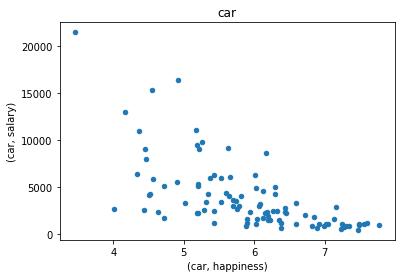

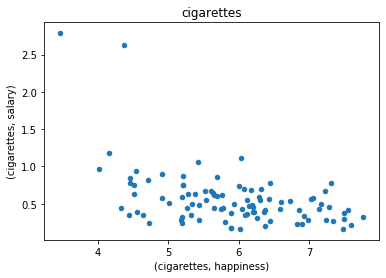

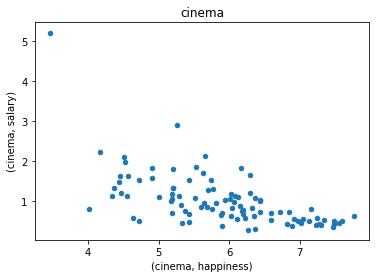

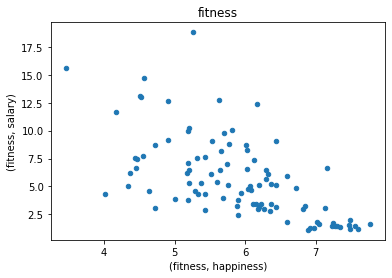

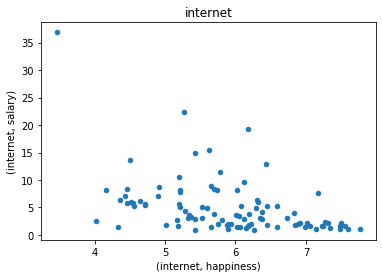

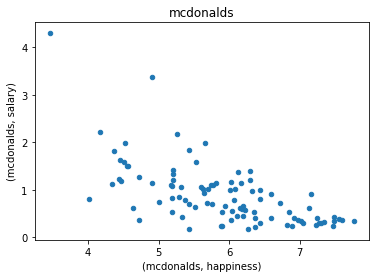

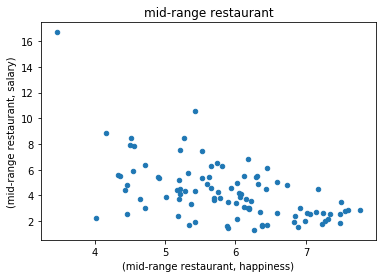

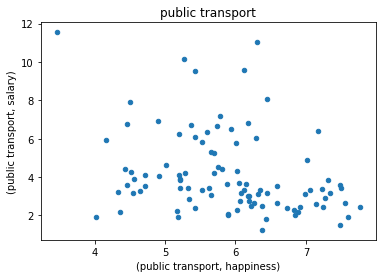

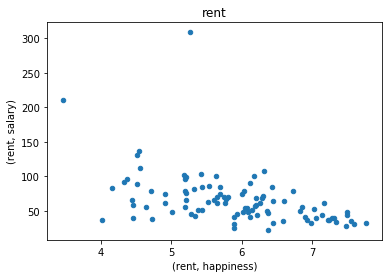

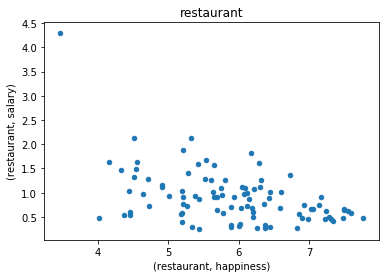

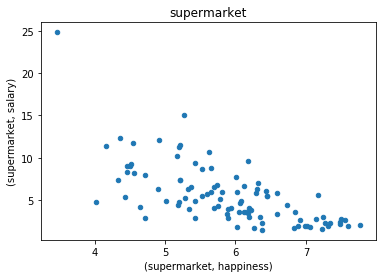

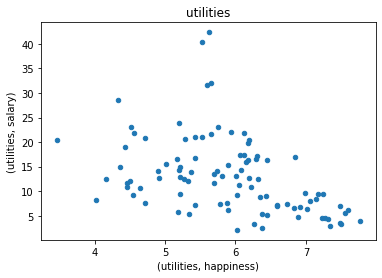

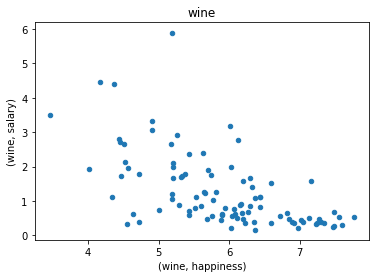

In [30]:
for idx, gp in df1.groupby(level=0, axis=1):
    gp.plot.scatter(x=(idx,'happiness'), y=(idx,'salary'), title=idx)

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df1['wine'] > 40

,salary,happiness
country,,
Kazakhstan,False,False
Paraguay,False,False
Portugal,False,False
Syria,False,False
Greece,False,False
Latvia,False,False
Iran,False,False
Morocco,False,False
Panama,False,False


In [98]:
lista = []

for idx in df1:
    lista.append(idx)
    
print(lista)

for x in lista:
    if 'supermarket' in x:
        print(x)
        
for idx, gp in df1.groupby(level=0, axis=1):
    gp.plot.scatter(x=(idx,'happiness'), y=(idx,'salary'), title=idx)

[('supermarket', 'salary'), ('supermarket', 'happiness'), ('restaurant', 'salary'), ('restaurant', 'happiness'), ('mid-range restaurant', 'salary'), ('mid-range restaurant', 'happiness'), ('mcdonalds', 'salary'), ('mcdonalds', 'happiness'), ('wine', 'salary'), ('wine', 'happiness'), ('cigarettes', 'salary'), ('cigarettes', 'happiness'), ('rent', 'salary'), ('rent', 'happiness'), ('utilities', 'salary'), ('utilities', 'happiness'), ('internet', 'salary'), ('internet', 'happiness'), ('fitness', 'salary'), ('fitness', 'happiness'), ('cinema', 'salary'), ('cinema', 'happiness'), ('public transport', 'salary'), ('public transport', 'happiness'), ('car', 'salary'), ('car', 'happiness')]
('supermarket', 'salary')
('supermarket', 'happiness')


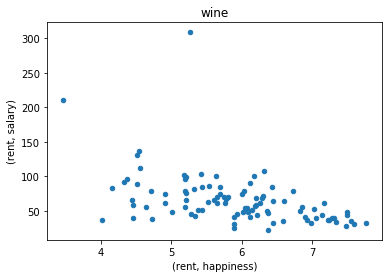

In [50]:
df1.plot.scatter(x=('rent','happiness'), y=('rent', 'salary'), title='wine')

In [13]:
df1.drop(['Venezuela'])

supermarket           restaurant            \
                        salary happiness     salary happiness   
country                                                         
Kazakhstan            5.970981     5.809   1.259980     5.809   
Paraguay              6.805819     5.743   1.091082     5.743   
Portugal              4.036620     5.693   0.903451     5.693   
Syria                24.818214     3.462   4.303254     3.462   
Greece                5.261450     5.287   1.410955     5.287   
...                        ...       ...        ...       ...   
Denmark               1.936256     7.600   0.578966     7.600   
Dominican Republic    9.346526     5.425   1.584369     5.425   
Mexico                5.806602     6.595   1.010763     6.595   
Montenegro            5.472958     5.523   1.292825     5.523   
Indonesia            11.239640     5.192   0.590991     5.192   

                   mid-range restaurant           mcdonalds            \
                                 salary happiness    salary happiness   
country                                                                 
Kazakhstan                     6.299902     5.809  1.135309     5.809   
Paraguay                       6.552815     5.743  1.113219     5.743   
Portugal                       3.613805     5.693  0.722761     5.693   
Syria                         16.688521     3.462  4.303254     3.462   
Greece                         4.373959     5.287  0.846573     5.287   
...                                 ...       ...       ...       ...   
Denmark                        2.894831     7.600  0.361944     7.600   
Dominican Republic            10.558287     5.425  1.847387     5.425   
Mexico                         5.058045     6.595  0.924066     6.595   
Montenegro                     5.386770     5.523  0.646412     5.523   
Indonesia                      3.715315     5.192  1.077477     5.192   

                        wine            ...   internet              fitness  \
                      salary happiness  ...     salary happiness     salary   
country                                 ...                                   
Kazakhstan          1.259980     5.809  ...   2.758694     5.809  10.026791   
Paraguay            1.748893     5.743  ...   8.156230     5.743   7.043011   
Portugal            0.481841     5.693  ...   3.837861     5.693   3.945070   
Syria               3.504589     3.462  ...  36.881631     3.462  15.579926   
Greece              0.881847     5.287  ...   4.347151     5.287   4.563027   
...                      ...       ...  ...        ...       ...        ...   
Denmark             0.289483     7.600  ...   1.160816     7.600   1.177399   
Dominican Republic  2.376554     5.425  ...  14.869900     5.425   7.665091   
Mexico              1.518259     6.595  ...   5.182804     6.595   5.958851   
Montenegro          0.808016     5.523  ...   5.065719     5.523   6.112907   
Indonesia           5.895495     5.192  ...  10.627027     5.192   9.938739   

                                cinema           public transport            \
                   happiness    salary happiness           salary happiness   
country                                                                       
Kazakhstan             5.809  0.944322     5.809         4.411258     5.809   
Paraguay               5.743  1.527514     5.743         6.647691     5.743   
Portugal               5.693  0.843221     5.693         4.216106     5.693   
Syria                  3.462  5.221123     3.462        11.538920     3.462   
Greece                 5.287  1.128764     5.287         4.232864     5.287   
...                      ...       ...       ...              ...       ...   
Denmark                7.600  0.506505     7.600         1.929767     7.600   
Dominican Republic     5.425  1.518615     5.425         9.503084     5.425   
Mexico                 6.595  0.708380     6.595         3.539786     6.595   
Montenegro             5.523  